In [120]:
import numpy as np
import pandas as pd
import shapefile as shp
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='whitegrid', palette='pastel', color_codes=True)
sns.mpl.rc('figure', figsize=(10,6))

%matplotlib inline



In [121]:
shp_path = './colombia/MGN/MGN_URB_SECCION.shp'
sf = shp.Reader(shp_path)
len(sf.shapes())

29197

In [122]:
sf.records()[100]

Record #100: ['05', '05001', '05001000', '050011000000000304', '05001100000000030405', 0.00835836847144, 4.21824622668e-06, '05']

In [123]:
#sf.records()

In [124]:
def read_shapefile(sf):
    """
    Read a shapefile into a Pandas dataframe with a 'coords' 
    column holding the geometry information. This uses the pyshp
    package
    """
    fields = [x[0] for x in sf.fields][1:]
    records = sf.records()
    shps = [s.points for s in sf.shapes()]
    df = pd.DataFrame(columns=fields, data=records)
    df = df.assign(coords=shps)
    return df

def plot_shape(id, s=None):
    """ PLOTS A SINGLE SHAPE """
    plt.figure()
    ax = plt.axes()
    ax.set_aspect('equal')
    shape_ex = sf.shape(id)
    x_lon = np.zeros((len(shape_ex.points),1))
    y_lat = np.zeros((len(shape_ex.points),1))
    for ip in range(len(shape_ex.points)):
        x_lon[ip] = shape_ex.points[ip][0]
        y_lat[ip] = shape_ex.points[ip][1]
    plt.plot(x_lon,y_lat) 
    x0 = np.mean(x_lon)
    y0 = np.mean(y_lat)
    plt.text(x0, y0, s, fontsize=10)
    # use bbox (bounding box) to set plot limits
    plt.xlim(shape_ex.bbox[0],shape_ex.bbox[2])
    return x0, y0

def plot_shapes(ids, s = None):
    plt.figure(figsize = (20, 20))
    ax = plt.axes()
    ax.set_aspect('equal')
    for id in ids:
        shape_ex = sf.shape(id)
        x_lon = np.zeros((len(shape_ex.points),1))
        y_lat = np.zeros((len(shape_ex.points),1))
        for ip in range(len(shape_ex.points)):
            x_lon[ip] = shape_ex.points[ip][0]
            y_lat[ip] = shape_ex.points[ip][1]
        ax.plot(x_lon,y_lat) 
        x0 = np.mean(x_lon)
        y0 = np.mean(y_lat)        
        ax.text(x0, y0, id, fontsize=10)
        # use bbox (bounding box) to set plot limits
        #ax.xlim(shape_ex.bbox[0],shape_ex.bbox[2])
        
    

def plot_map(sf, x_lim = None, y_lim = None, figsize = (11,9)):
    '''
    Plot map with lim coordinates
    '''
    plt.figure(figsize = figsize)
    id=0
    for shape in sf.shapeRecords():
        x = [i[0] for i in shape.shape.points[:]]
        y = [i[1] for i in shape.shape.points[:]]
        plt.plot(x, y, 'k')
        
        if (x_lim == None) & (y_lim == None):
            x0 = np.mean(x)
            y0 = np.mean(y)
            plt.text(x0, y0, id, fontsize=10)
        id = id+1
    
    if (x_lim != None) & (y_lim != None):     
        plt.xlim(x_lim)
        plt.ylim(y_lim)

In [125]:
df = read_shapefile(sf)
df.shape

(29197, 9)

In [126]:
df.head()

,DPTO_CCDGO,MPIO_CCDGO,CPOB_CCDGO,SETU_CCNCT,SECU_CCNCT,SHAPE_Leng,SHAPE_Area,SECU_CCDGO,coords
0,05,05001,05001000,050011000000000101,05001100000000010101,0.015950,0.000008,01,"[(-75.54368794099997, 6.302767247000077), (-75..."
1,05,05001,05001000,050011000000000101,05001100000000010102,0.009184,0.000003,02,"[(-75.54563276099998, 6.300589277000029), (-75..."
2,05,05001,05001000,050011000000000101,05001100000000010103,0.011452,0.000005,03,"[(-75.54689251399998, 6.297690164000073), (-75..."
3,05,05001,05001000,050011000000000101,05001100000000010104,0.013045,0.000007,04,"[(-75.54345760699994, 6.29810154300003), (-75...."
4,05,05001,05001000,050011000000000101,05001100000000010105,0.009147,0.000003,05,"[(-75.54299563799998, 6.294628505000048), (-75..."


In [127]:
df[df.MPIO_CCDGO == '05002'].index.get_values()

array([1033, 1034, 1035, 1036, 1037, 1038, 1039, 1040, 1041, 1042, 1043],
      dtype=int64)

(-75.54400666846117, 6.300541326232809)

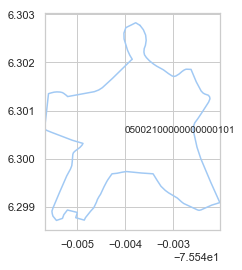

In [128]:
code = '05002100000000000101'
com_id = df[df.MPIO_CCDGO == '05001'].index.get_values()[0]
plot_shape(com_id, code)

In [129]:
idxs = list(df[(df['DPTO_CCDGO'] == '05') & (df['MPIO_CCDGO'] == '05002')].index)
idxs

[1033, 1034, 1035, 1036, 1037, 1038, 1039, 1040, 1041, 1042, 1043]

(-75.42860439947496, 5.781757781491716)

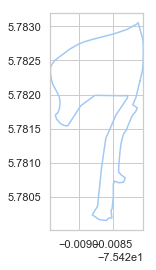

In [130]:
plot_shape(1043)

In [131]:
df[(df['DPTO_CCDGO'] == '05') & (df['MPIO_CCDGO'] == '05002')]

,DPTO_CCDGO,MPIO_CCDGO,CPOB_CCDGO,SETU_CCNCT,SECU_CCNCT,SHAPE_Leng,SHAPE_Area,SECU_CCDGO,coords
1033,05,05002,05002000,050021000000000001,05002100000000000101,0.032286,1.169303e-05,01,"[(-75.43071839599997, 5.799560889000077), (-75..."
1034,05,05002,05002000,050021000000000001,05002100000000000102,0.011579,6.951132e-06,02,"[(-75.42699298299993, 5.794022721000033), (-75..."
1035,05,05002,05002000,050021000000000001,05002100000000000103,0.017872,1.019394e-05,03,"[(-75.42521585299994, 5.793288669000049), (-75..."
1036,05,05002,05002000,050021000000000001,05002100000000000104,0.020168,1.161291e-05,04,"[(-75.42324415499996, 5.7886678580000535), (-7..."
1037,05,05002,05002000,050021000000000001,05002100000000000105,0.011142,7.120349e-06,05,"[(-75.42753607799995, 5.790258368000025), (-75..."
1038,05,05002,05002000,050021000000000001,05002100000000000106,0.024963,1.927247e-05,06,"[(-75.42852981199997, 5.791272786000036), (-75..."
1039,05,05002,05002000,050021000000000001,05002100000000000107,0.020757,1.792101e-05,07,"[(-75.43211311399995, 5.794198499000061), (-75..."
1040,05,05002,05002000,050021000000000001,05002100000000000108,0.021333,1.631417e-05,08,"[(-75.42684351299994, 5.787677159000054), (-75..."
1041,05,05002,05002002,050022002030020001,05002200203002000101,0.026131,6.274864e-06,01,"[(-75.49222793199993, 5.731452864000062), (-75..."
1042,05,05002,05002004,050022003030040001,05002200303004000101,0.007334,8.950123e-07,01,"[(-75.51412290899998, 5.763939522000044), (-75..."


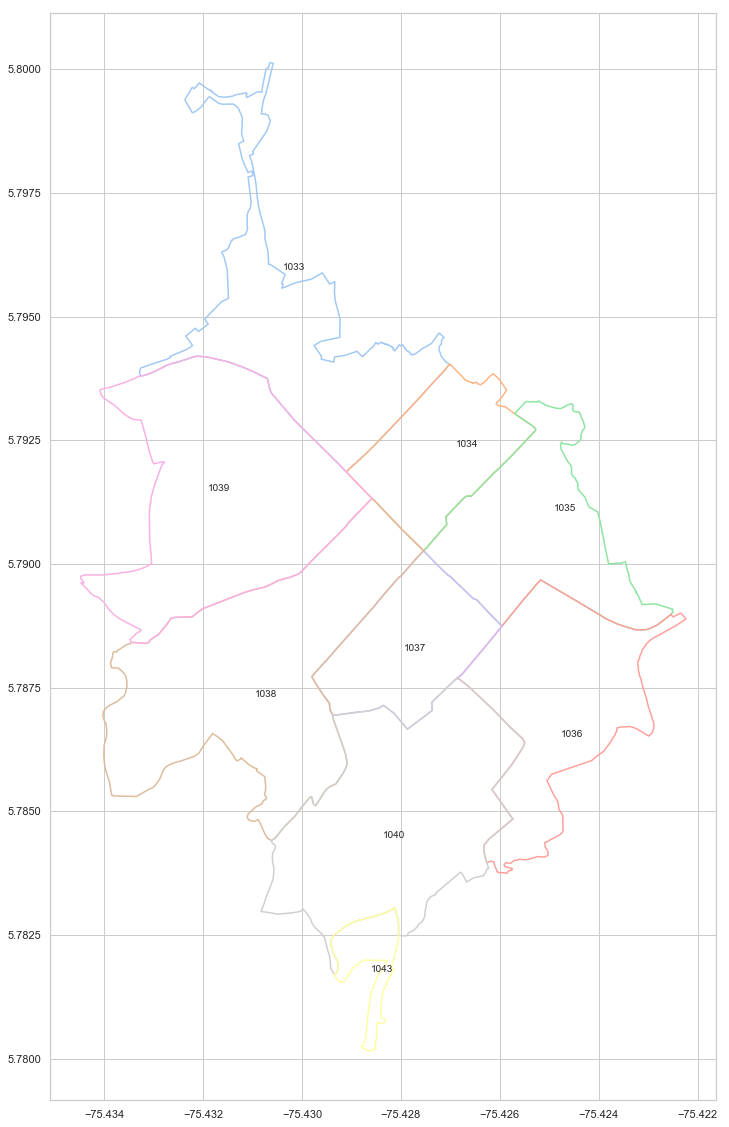

In [132]:
idxs = list(df[(df['DPTO_CCDGO'] == '05') & (df['MPIO_CCDGO'] == '05002')].index)
plot_shapes([1033, 1034, 1035, 1036, 1037, 1038, 1039, 1040, 1043])